In [1]:
#package for data analysis
import numpy as np
import pandas as pd

#svm
from sklearn import svm

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [2]:
recipes=pd.read_csv('recipes_muffins_cupcakes.csv')
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


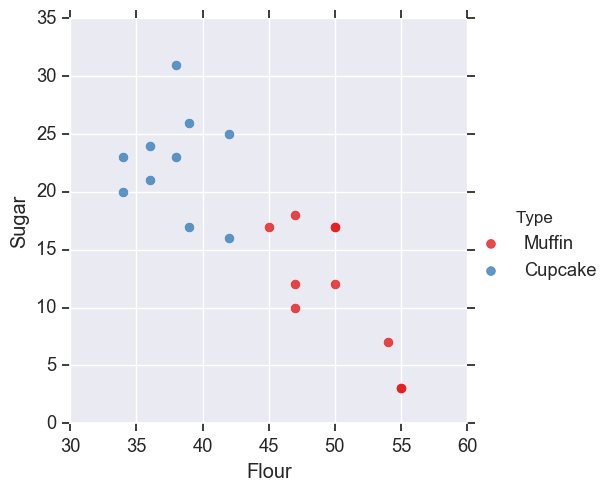

In [3]:
#plot our data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',
          fit_reg=False,scatter_kws={"s":40})

In [4]:
type_label=np.where(recipes['Type']=='Muffin',0,1)
print(type_label)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [11]:
recipe_features=recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [12]:
#fit the model
model=svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
#set the seperating hyperplane
w=model.coef_[0]
m=-w[0]/w[1]
xx=np.linspace(30,60)
yy=m * xx - model.intercept_[0]/w[1]
print(np.array(np.column_stack((xx,yy))))
#plot the parallels to seprating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = m * xx + (b[1] - m * b[0])
b = model.support_vectors_[-1]
yy_up = m * xx + (b[1] - m * b[0])

[[  3.00000000e+01   1.15779472e+16]
 [  3.06122449e+01   1.10528750e+16]
 [  3.12244898e+01   1.05278028e+16]
 [  3.18367347e+01   1.00027306e+16]
 [  3.24489796e+01   9.47765844e+15]
 [  3.30612245e+01   8.95258624e+15]
 [  3.36734694e+01   8.42751405e+15]
 [  3.42857143e+01   7.90244185e+15]
 [  3.48979592e+01   7.37736965e+15]
 [  3.55102041e+01   6.85229746e+15]
 [  3.61224490e+01   6.32722526e+15]
 [  3.67346939e+01   5.80215306e+15]
 [  3.73469388e+01   5.27708087e+15]
 [  3.79591837e+01   4.75200867e+15]
 [  3.85714286e+01   4.22693647e+15]
 [  3.91836735e+01   3.70186428e+15]
 [  3.97959184e+01   3.17679208e+15]
 [  4.04081633e+01   2.65171988e+15]
 [  4.10204082e+01   2.12664769e+15]
 [  4.16326531e+01   1.60157549e+15]
 [  4.22448980e+01   1.07650329e+15]
 [  4.28571429e+01   5.51431096e+14]
 [  4.34693878e+01   2.63588995e+13]
 [  4.40816327e+01  -4.98713297e+14]
 [  4.46938776e+01  -1.02378549e+15]
 [  4.53061224e+01  -1.54885769e+15]
 [  4.59183673e+01  -2.07392989e+15]
 

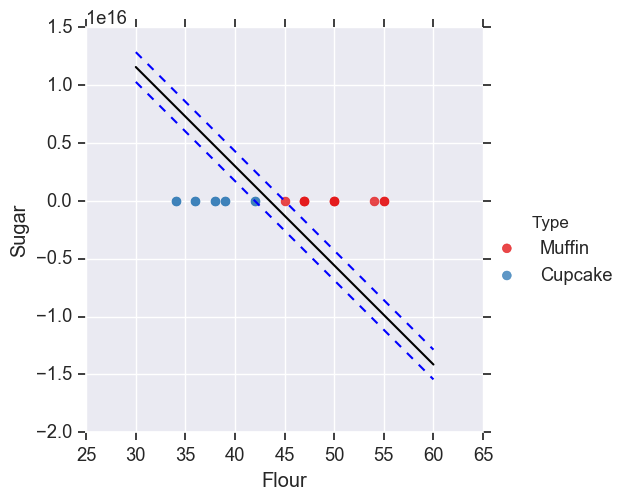

In [53]:
#plot our data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',
          fit_reg=False,scatter_kws={"s":40})
plt.plot(xx,yy,color='black')
plt.plot(xx,yy_down,'--',color='blue')
plt.plot(xx,yy_up,'--',color='blue')

In [36]:
def muffin_or_cupcake(flour,sugar):
    if (model.predict([[flour,sugar]])==0):
        print("This is Muffin")
    else :
        print("This is cupcake")
muffin_or_cupcake(54,4)    

This is Muffin


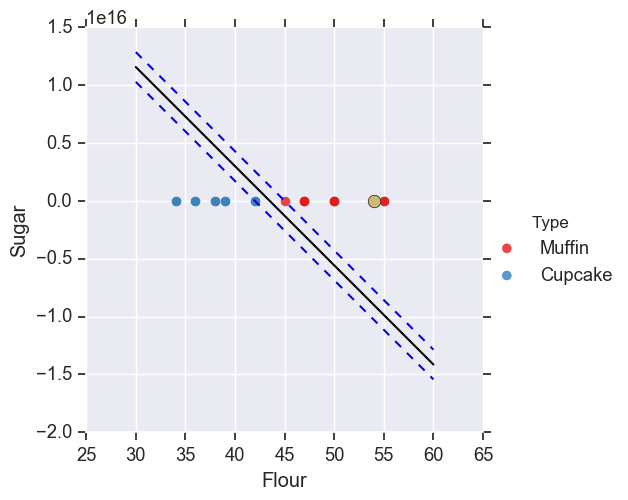

In [55]:
# plotting the graph
#plot our data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',
          fit_reg=False,scatter_kws={"s":40})
plt.plot(xx,yy,color='black')
plt.plot(xx,yy_down,'--',color='blue')
plt.plot(xx,yy_up,'--',color='blue')
plt.plot(54,4,'yo',markersize="9")